- Supervisionado
- ultilizado para classificação
- probabilidade condicional
-  Calculo:
    - queremos calcular a probabilidade da palavra love ser positiva ou negativa
    - P(positive| love)=P('love|positive)* P(positive)/P('love)
    - 3/8(a palavra love aparece 3 vezes como positiva e o total de palavras positivas é 8)* 8/14(sao 8 palavras positivas para o total de 14 palavras)/
    5/14(a palavra love aparece no toalde 5 vezes)
    - 0.37*0.57/0.35=0.60
- Pode ser classificado em 3 tipos:
   - multinomial:

    frequência de termos,

    classificação de textos

   - bernoulli:

    valores binarios

    matriz de presença de valores

   - gaussian :

    variação de algoritmos para valores continuos

    calcula a media e o desvio padrao






In [3]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [4]:
dataset=pd.read_csv('Tweets_Mg.csv',encoding='utf-8')

In [11]:
dataset

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN
...,...,...,...,...,...,...,...,...,...,...
8194,Thu Feb 09 11:48:07 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,NaN,Ana Lúcia,lapiseirapentel,0,Positivo,NaN
8195,Thu Feb 09 12:10:19 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Belo Horizonte - Minas Gerais,Marcelo Rezende,Televans,0,Positivo,NaN
8196,Thu Feb 09 12:04:17 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Guarulhos - SP,Leonardo Nascimento,leonardogru,0,Positivo,NaN
8197,Thu Feb 09 12:10:04 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Brasil Natal/RN,Lucas Medeiros �©™,parabolicalucas,0,Positivo,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [6]:
dataset.drop_duplicates(['Text'],inplace=True)

In [7]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [9]:
for i in dataset.columns.values:
  if i.startswith("Unnamed"):
    dataset.drop(i,axis=1,inplace=True)
    print("Colunas Deletadas:",i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


distribuição das classes neutros,positivos e negativos

<Axes: xlabel='Classificacao'>

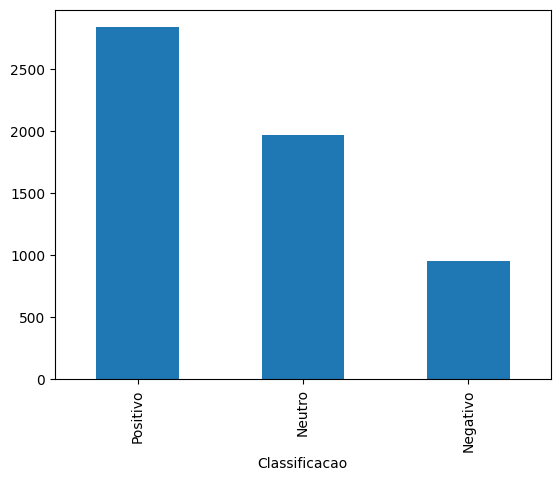

In [10]:
dataset.Classificacao.value_counts().plot(kind='bar')

In [13]:
tweets=dataset['Text']
classes=dataset['Classificacao']

Gerando modelo


In [18]:
vectorizer=CountVectorizer(analyzer='word')
freq_tweets=vectorizer.fit_transform(tweets)

In [19]:
type(freq_tweets)

scipy.sparse._csr.csr_matrix

In [20]:
freq_tweets.shape

(5765, 13029)

In [22]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Criando modelo multinomial

In [24]:
modelo=MultinomialNB()
modelo.fit(freq_tweets,classes)


MultinomialNB()

In [25]:
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [27]:
#transforma os daods de test em vetors de palavras
freq_testes=vectorizer.transform(testes)

In [30]:
for t,c,in zip(testes,modelo.predict(freq_testes)):
  print(t+": "+ c)

Esse governo está no início, vamos ver o que vai dar: Neutro
Estou muito feliz com o governo de Minas esse ano: Neutro
O estado de Minas Gerais decretou calamidade financeira!!!: Negativo
A segurança desse país está deixando a desejar: Neutro
O governador de Minas é mais uma vez do PT: Neutro


In [34]:
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

In [41]:
resultados =cross_val_predict(modelo,freq_tweets,classes,cv=10)

In [37]:
print(pd.crosstab(classes,resultados,rownames=['Real'],colnames=['Predito'],margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       846     100         5   951
Neutro         206    1656       112  1974
Positivo        53     294      2493  2840
All           1105    2050      2610  5765


In [39]:
sentimento=['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes,resultados,target_names=sentimento))

              precision    recall  f1-score   support

    Positivo       0.77      0.89      0.82       951
    Negativo       0.81      0.84      0.82      1974
      Neutro       0.96      0.88      0.91      2840

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



Tunning naive bayes

In [42]:
from sklearn.model_selection import GridSearchCV

Definindo lista de valores de alfa

In [44]:
lista_alpha=list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

dicionario com nome do parametro e a lista de valores

In [45]:
parametros_grid=dict(alpha=lista_alpha)

In [46]:
nvModelo=MultinomialNB()

In [47]:
grid=GridSearchCV(nvModelo,parametros_grid,cv=10,scoring='accuracy')

In [49]:
freq_tweets=vectorizer.fit_transform(tweets)
grid.fit(freq_tweets,classes)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

scores

In [55]:
print(grid.cv_results_)


{'mean_fit_time': array([0.02861395, 0.0282845 , 0.02885695, 0.0297426 , 0.02772577,
       0.0287291 , 0.02827187, 0.02716074, 0.02756944, 0.02847245]), 'std_fit_time': array([0.00430371, 0.00178535, 0.0059401 , 0.00442683, 0.00185531,
       0.00405626, 0.00265745, 0.00086522, 0.00180026, 0.00491116]), 'mean_score_time': array([0.00220373, 0.00218866, 0.00240366, 0.0024668 , 0.00217276,
       0.00245752, 0.0026721 , 0.00217435, 0.00217092, 0.00244291]), 'std_score_time': array([7.85429436e-05, 6.56436493e-05, 6.73656495e-04, 7.58476715e-04,
       9.81042943e-05, 9.32580184e-04, 1.33292744e-03, 3.70771861e-05,
       7.22876521e-05, 7.01100121e-04]), 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1}, {'alpha': 2}, {'alpha': 3}, {'alpha': 4}, {'alpha': 5}, {'alpha': 6}, {'alpha': 7}, {'al

In [53]:
grid.best_params_

{'alpha': 1}

In [54]:
grid.best_score_

0.8664846307529368